In [50]:
import itk
import numpy as np

# Charger les deux scans
gre1 = itk.imread("../Data/case6_gre1.nrrd")
gre2 = itk.imread("../Data/case6_gre2.nrrd")

# Examiner les propriétés des images
print(f"gre 1 - Taille: {itk.size(gre1)}")
print(f"gre 1 - Spacing: {itk.spacing(gre1)}")
print(f"gre 1 - Origin: {itk.origin(gre1)}")

print(f"gre 2 - Taille: {itk.size(gre2)}")
print(f"gre 2 - Spacing: {itk.spacing(gre2)}")
print(f"gre 2 - Origin: {itk.origin(gre2)}")

gre 1 - Taille: itkSize3 ([256, 256, 176])
gre 1 - Spacing: itkVectorD3 ([1, 1, 1])
gre 1 - Origin: itkPointD3 ([84.3302, -127.057, 170.186])
gre 2 - Taille: itkSize3 ([256, 256, 176])
gre 2 - Spacing: itkVectorD3 ([1, 1, 1])
gre 2 - Origin: itkPointD3 ([81.544, -132.07, 125.97])


In [60]:
import itk

fixed_image = itk.imread("../Data/case6_gre1.nrrd", itk.F)
moving_image = itk.imread("../Data/case6_gre2.nrrd", itk.F)

dimension = 3
FixedImageType = type(fixed_image)
MovingImageType = type(moving_image)


TransformType = itk.TranslationTransform[itk.D, dimension]
transform = TransformType.New()

optimizer = itk.RegularStepGradientDescentOptimizerv4.New(
    LearningRate=1.0,
    MinimumStepLength=0.001,
    NumberOfIterations=200,
)


metric = itk.MeanSquaresImageToImageMetricv4[FixedImageType, MovingImageType].New()

registration = itk.ImageRegistrationMethodv4[FixedImageType, MovingImageType].New(
    Metric=metric,
    Optimizer=optimizer,
    FixedImage=fixed_image,
    MovingImage=moving_image,
    InitialTransform=transform,
)

registration.Update()

resampler = itk.ResampleImageFilter.New(
    Input=moving_image,
    Transform=registration.GetTransform(),
    UseReferenceImage=True,
    ReferenceImage=fixed_image,
    DefaultPixelValue=0,
)
resampled_image = resampler.Update()

itk.imwrite(resampler, "aligned.nrrd")


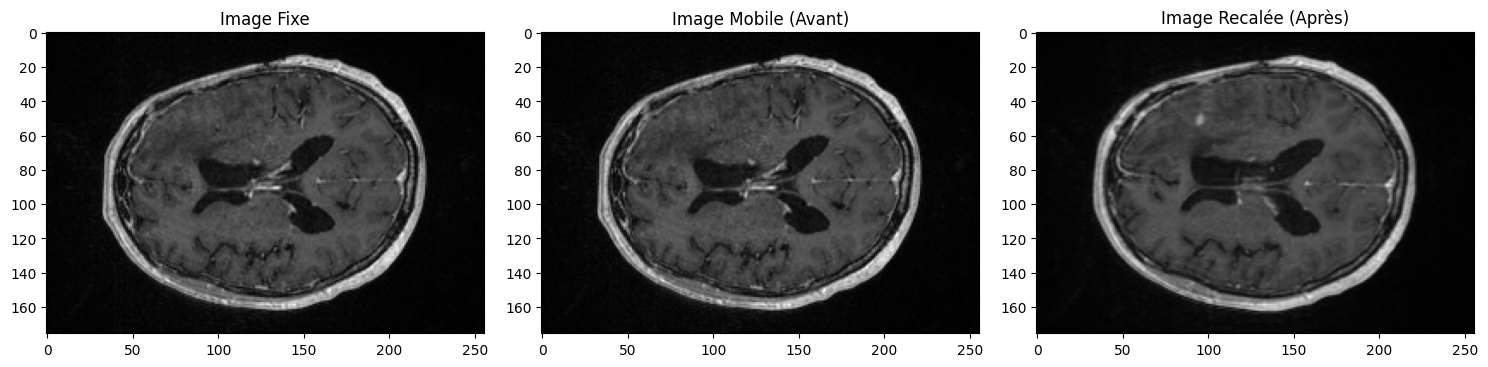

In [68]:
import matplotlib.pyplot as plt
import itk

# Charger les images
fixed_image = itk.imread("../Data/case6_gre1.nrrd", itk.F)
moving_image = itk.imread("../Data/case6_gre1.nrrd", itk.F)
registered_image = itk.imread("registered_moving.nrrd", itk.F)

# Convertir en array numpy
fixed_array = itk.GetArrayViewFromImage(fixed_image)
moving_array = itk.GetArrayViewFromImage(moving_image)
registered_array = itk.GetArrayViewFromImage(registered_image)

# Choisir une coupe axiale (au centre)
z = fixed_array.shape[0] // 2

# Affichage côte à côte
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(fixed_array[:, z, :], cmap="gray")
axes[0].set_title("Image Fixe")
axes[1].imshow(moving_array[:, z, :], cmap="gray")
axes[1].set_title("Image Mobile (Avant)")
axes[2].imshow(registered_array[:, z, :], cmap="gray")
axes[2].set_title("Image Recalée (Après)")
plt.tight_layout()
plt.show()
